In [111]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter
%matplotlib inline

In [79]:
tv = pd.read_csv('tv.csv')
music = pd.read_csv('halftime_musicians.csv')
super_bowls = pd.read_csv('super_bowls.csv')


Q1

In [80]:
display(tv.head())

,super_bowl,network,avg_us_viewers,total_us_viewers,rating_household,share_household,rating_18_49,share_18_49,ad_cost
0,52,NBC,103390000,NaN,43.1,68,33.4,78.0,5000000
1,51,Fox,111319000,172000000.0,45.3,73,37.1,79.0,5000000
2,50,CBS,111864000,167000000.0,46.6,72,37.7,79.0,5000000
3,49,NBC,114442000,168000000.0,47.5,71,39.1,79.0,4500000
4,48,Fox,112191000,167000000.0,46.7,69,39.3,77.0,4000000


In [128]:
display(music)

,super_bowl,musician,num_songs
0,52,Justin Timberlake,11.0
1,52,University of Minnesota Marching Band,1.0
2,51,Lady Gaga,7.0
3,50,Coldplay,6.0
4,50,Beyoncé,3.0
...,...,...,...
129,3,Florida A&M University Marching 100 Band,NaN
130,2,Grambling State University Tiger Marching Band,NaN
131,1,University of Arizona Symphonic Marching Band,NaN
132,1,Grambling State University Tiger Marching Band,NaN


In [116]:
display(super_bowls.head())

,date,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
super_bowl,,,,,,,,,,,,,,,,,
52,2018-02-04,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8
51,2017-02-05,NRG Stadium,Houston,Texas,70807,New England Patriots,34,Tom Brady,NaN,Bill Belichick,Atlanta Falcons,28,Matt Ryan,NaN,Dan Quinn,62,6
50,2016-02-07,Levi's Stadium,Santa Clara,California,71088,Denver Broncos,24,Peyton Manning,NaN,Gary Kubiak,Carolina Panthers,10,Cam Newton,NaN,Ron Rivera,34,14
49,2015-02-01,University of Phoenix Stadium,Glendale,Arizona,70288,New England Patriots,28,Tom Brady,NaN,Bill Belichick,Seattle Seahawks,24,Russell Wilson,NaN,Pete Carroll,52,4
48,2014-02-02,MetLife Stadium,East Rutherford,New Jersey,82529,Seattle Seahawks,43,Russell Wilson,NaN,Pete Carroll,Denver Broncos,8,Peyton Manning,NaN,John Fox,51,35


In [83]:
super_bowls.set_index('super_bowl', inplace = True)

Q2

In [84]:
music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   super_bowl  134 non-null    int64  
 1   musician    134 non-null    object 
 2   num_songs   88 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.3+ KB


In [85]:
tv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   super_bowl        53 non-null     int64  
 1   network           53 non-null     object 
 2   avg_us_viewers    53 non-null     int64  
 3   total_us_viewers  15 non-null     float64
 4   rating_household  53 non-null     float64
 5   share_household   53 non-null     int64  
 6   rating_18_49      15 non-null     float64
 7   share_18_49       6 non-null      float64
 8   ad_cost           53 non-null     int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 3.9+ KB


Q3

Text(0.5, 0, 'Combined Points')

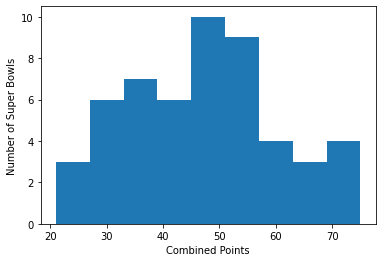

In [90]:
bins = np.linspace(super_bowls['combined_pts'].min(), super_bowls['combined_pts'].max(), 10)
fig, ax = plt.subplots()
ax.hist(super_bowls['combined_pts'], bins = bins)
ax.set_ylabel('Number of Super Bowls')
ax.set_xlabel('Combined Points')

In [62]:
super_bowls['combined_pts'].idxmax()

29

In [63]:
super_bowls['combined_pts'].idxmin()

7

Q5

Text(0.5, 0, 'Points Difference')

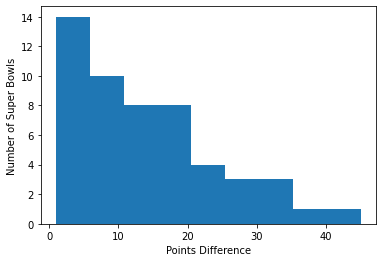

In [92]:
bins2 =np.linspace(super_bowls['difference_pts'].min(), super_bowls['difference_pts'].max(), 10)
fig, ax2 = plt.subplots()
ax2.hist(super_bowls['difference_pts'], bins = bins2)
ax2.set_ylabel('Number of Super Bowls')
ax2.set_xlabel('Points Difference')

Q6

In [93]:
merge1 = pd.merge(super_bowls,tv,how = 'outer', on = 'super_bowl')

In [117]:
merge1.head()

,super_bowl,date,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,...,combined_pts,difference_pts,network,avg_us_viewers,total_us_viewers,rating_household,share_household,rating_18_49,share_18_49,ad_cost
0,52,2018-02-04,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NaN,...,74,8,NBC,103390000,NaN,43.1,68,33.4,78.0,5000000
1,51,2017-02-05,NRG Stadium,Houston,Texas,70807,New England Patriots,34,Tom Brady,NaN,...,62,6,Fox,111319000,172000000.0,45.3,73,37.1,79.0,5000000
2,50,2016-02-07,Levi's Stadium,Santa Clara,California,71088,Denver Broncos,24,Peyton Manning,NaN,...,34,14,CBS,111864000,167000000.0,46.6,72,37.7,79.0,5000000
3,49,2015-02-01,University of Phoenix Stadium,Glendale,Arizona,70288,New England Patriots,28,Tom Brady,NaN,...,52,4,NBC,114442000,168000000.0,47.5,71,39.1,79.0,4500000
4,48,2014-02-02,MetLife Stadium,East Rutherford,New Jersey,82529,Seattle Seahawks,43,Russell Wilson,NaN,...,51,35,Fox,112191000,167000000.0,46.7,69,39.3,77.0,4000000


<AxesSubplot:xlabel='difference_pts', ylabel='share_household'>

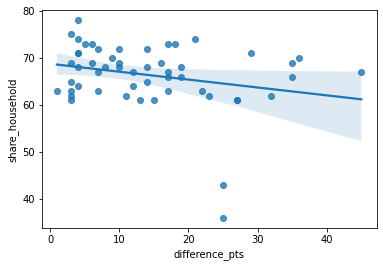

In [104]:
sns.regplot(x='difference_pts', y='share_household', data=merge1)

<AxesSubplot:xlabel='super_bowl', ylabel='avg_us_viewers'>

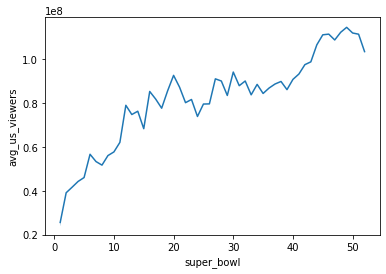

In [114]:
sns.lineplot(x = 'super_bowl', y = 'avg_us_viewers', data = merge1)
#sns.lineplot(x = 'super_bowl', y = 'rating_household', data = merge1)


<AxesSubplot:xlabel='super_bowl', ylabel='rating_household'>

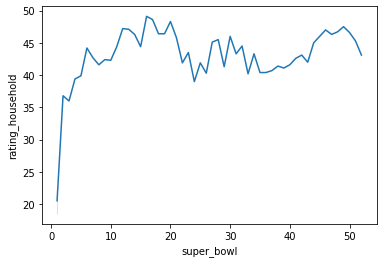

In [115]:
sns.lineplot(x = 'super_bowl', y = 'rating_household', data = merge1)

<AxesSubplot:xlabel='super_bowl', ylabel='ad_cost'>

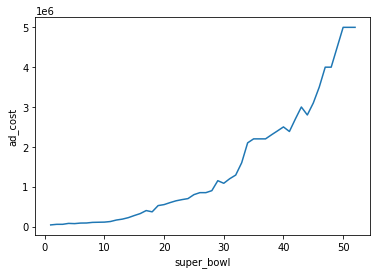

In [118]:
sns.lineplot(x = 'super_bowl', y = 'ad_cost', data = merge1)

Q7

In [125]:
music[music['super_bowl']<=27].head()

,super_bowl,musician,num_songs
80,27,Michael Jackson,5.0
81,26,Gloria Estefan,2.0
82,26,University of Minnesota Marching Band,NaN
83,25,New Kids on the Block,2.0
84,24,Pete Fountain,1.0


Q8

In [127]:
mp = music.groupby('musician').count()['super_bowl'].reset_index()
mp.sort_values('super_bowl', ascending=False, inplace= True)
mp[mp['super_bowl'] >= 1]

,musician,super_bowl
28,Grambling State University Tiger Marching Band,6
104,Up with People,4
1,Al Hirt,4
83,The Human Jukebox,3
76,Spirit of Troy,2
...,...,...
37,Katy Perry,1
35,Judy Mallett,1
34,Jessica Simpson,1
33,Janet Jackson,1


Q9

In [129]:
march_bands = music[~music['musician'].str.contains('Marching')]
march_bands = march_bands[~march_bands['musician'].str.contains('Spirit')]
march_bands.sort_values('num_songs', ascending=False, inplace=True)
display(march_bands.head(15))

,super_bowl,musician,num_songs
0,52,Justin Timberlake,11.0
70,30,Diana Ross,10.0
10,49,Katy Perry,8.0
2,51,Lady Gaga,7.0
90,23,Elvis Presto,7.0
33,41,Prince,7.0
16,47,Beyoncé,7.0
14,48,Bruno Mars,6.0
3,50,Coldplay,6.0
25,45,The Black Eyed Peas,6.0


Q10

In [130]:
winner_liii = 'New England Patriots'
print('The winner of Super Bowl LIII was', winner_liii)

The winner of Super Bowl LIII was New England Patriots
